In [1]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
T = []
f = []
B01fit = []
gamma1fit = []
A1fit = []
B02fit = []
gamma2fit = []
A2fit = []
B03fit = []
gamma3fit = []
A3fit = []
coffset = []

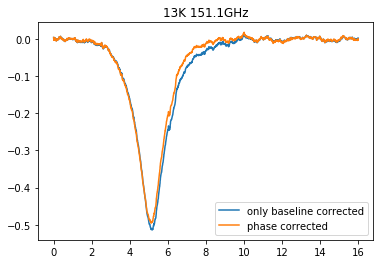

In [17]:
##############################################################################################################################
##############################################################################################################################
# set once in the beginning
compound = 'Li'
state = 'loose'
#measurement = '4 K'
measurement = 'TempDep151p1_new'

frequency = '151.1' # enter 330.5 for temperature sweep and 330p5 for frequency sweep (don't type GHz at the end)
temperature = '13'
sweep = 'up'
sweep = 'down'
###############################################################################################################################
##############################################################################################################################

# create file path of the folder containing all the data files
path1 = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\" + compound + "CuFe2(VO4)3 powder\\"
path2 = "ESR_" + state + "_powder\\processed_data\\"
folder = path1 + path2 + measurement #+ '\\phase corrected'

# gives array of all the filesnames contained in previously created folder
files = os.listdir(folder)

# find filename of file you want to import
# this is based on the frequency, temperature and sweep you entered at the top
for i in np.arange(len(files)):
    if files[i].find(temperature+'K') != -1:
        if files[i].find(frequency) != -1:
            if files[i].find(sweep) != -1:
                filename = folder+'\\'+files[i]

                
# import data
data = data_import(filename, 3)

# put the important data into arrays
# check if phase correction has been performed on this data set
# this is done by simply checking if the imported data has the right amount of columns

if filename.find('processed_p') != -1:
#if len(data) == 12:
    field = data[0] # magnetic field
    Amp_pc = data[3] # phase corrected data
    Amp_bg = data[7] # only baseline corrected
else:
    field = data[0] # magnetic field
    Amp_bg = data[3] # only baseline corrected
    
# plot the imported signal
plt.plot(field, Amp_bg)
if filename.find('processed_p') != -1:
#if len(data) == 12:
    plt.plot(field, Amp_pc)
plt.title(comment(filename))
plt.legend(['only baseline corrected', 'phase corrected'])

## Fit Lorentzian absorption lines to the data 

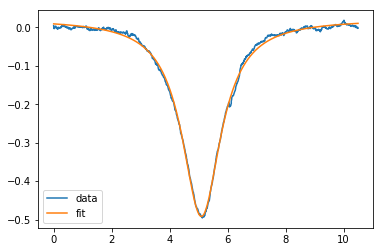

In [19]:
##############################################################################################################################
##############################################################################################################################
# do you want to fit the phase corrected or baseline corrected data?
# Amp_pc or Amp_bg
data = Amp_pc
# how many Lorentzians do you want to fit to the data? - 1 or 2
number = 1
# in which field range do you want to fit
lower = 0
upper = 10.5
##############################################################################################################################
##############################################################################################################################

# get rid of all possible np.nan's in the data arrays
mask1 = np.logical_not(np.isnan(data))
data = data[mask1]
B = field[mask1]

mask2 = (B > lower) & (B < upper)
data = data[mask2]
B = B[mask2]


# fit one or two Lorentzian absorption curves to the data
# how many depends on what you entered above
if number == 1:
    lower_bounds = [0, 0, 0, -np.inf]
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]
    
    initial_guess = [5.3, 0.1, 0.2, 0]
    popt, pcov = curve_fit (one_Lorentzian_off, B, data, initial_guess, bounds = (lower_bounds, upper_bounds), 
                        maxfev=70000, ftol=2.220446049250313e-16 )
    
elif number == 2:
    lower_bounds = [0, 0, 0, 0, 0, 0, 0]
    upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
    
    initial_guess = [3.3, 0.1, 0.1, 3.6, 0.1, 0.1, 0]
    
    popt, pcov = curve_fit (two_Lorentzians_off, B, data, initial_guess, bounds = (lower_bounds, upper_bounds), 
                        maxfev=70000, ftol=2.220446049250313e-16 )
    
elif number == 3:
    lower_bounds = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
    
    initial_guess = [3.5, 0.01, 0.01, 3.55, 0.01, 0.01, 3.6, 0.01, 0.01, 0]
    
    popt, pcov = curve_fit (three_Lorentzians_off, B, data, initial_guess, bounds = (lower_bounds, upper_bounds), 
                        maxfev=70000, ftol=2.220446049250313e-16 )
       

#pcov = np.sqrt(pcov)        
# put the fit results into variables
B01 = np.array([popt[0], pcov[0,0]])
A1 = np.array([popt[1], pcov[1,1]])
gamma1 = np.array([popt[2], pcov[2,2]])



if number == 1:
    offset = np.array([popt[3], pcov[3,3]])
elif number == 2:
    B02 = np.array([popt[3], pcov[3,3]])
    A2 = np.array([popt[4], pcov[4,4]])
    gamma2 = np.array([popt[5], pcov[5,5]])
    offset = np.array([popt[6], pcov[6,6]])
elif number == 3:
    B02 = np.array([popt[3], pcov[3,3]])
    A2 = np.array([popt[4], pcov[4,4]])
    gamma2 = np.array([popt[5], pcov[5,5]])
    B03 = np.array([popt[6], pcov[6,6]])
    A3 = np.array([popt[7], pcov[7,7]])
    gamma3 = np.array([popt[8], pcov[8,8]])
    offset = np.array([popt[9], pcov[9,9]])
   
    

    
    
# plot the fit results
if number == 1:
    fit = one_Lorentzian_off(B, B01[0], A1[0], gamma1[0], offset[0])
elif number ==2:
    fit = two_Lorentzians_off(B, B01[0], A1[0], gamma1[0], B02[0], A2[0], gamma2[0], offset[0])
    fit1 = one_Lorentzian(B, B01[0], A1[0], gamma1[0])
    fit2 = one_Lorentzian(B, B02[0], A2[0], gamma2[0])
elif number ==3:
    fit = three_Lorentzians_off(B, B01[0], A1[0], gamma1[0], B02[0], A2[0], gamma2[0], B03[0], A3[0], gamma3[0], offset[0])
    fit1 = one_Lorentzian(B, B01[0], A1[0], gamma1[0])
    fit2 = one_Lorentzian(B, B02[0], A2[0], gamma2[0])
    fit3 = one_Lorentzian(B, B03[0], A3[0], gamma3[0])

expdata = data    
plt.plot(B, expdata)
plt.plot(B, fit)
if number == 2:
    plt.plot(B, fit1)
    plt.plot(B, fit2)
elif number ==3:
    plt.plot(B, fit1)
    plt.plot(B, fit2)
    plt.plot(B, fit3)
plt.legend(['data', 'fit', 'L1', 'L2', 'L3'])

In [20]:
data = [B, expdata, fit]
units = ['T', 'a.u.', 'a.u.']
names = ['B', 'ESR Transmision', 'fit']

#com = frequency + ' GHz'
com = temperature + ' K'
comments = [com, com, com]
name = temperature + '_K.txt'

path1 = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\" + compound + "CuFe2(VO4)3 powder\\"
path2 = "ESR_" + state + "_powder\\fits\\individual_temperatures\\"
filename = path1 + path2 + '151.1_GHz\\' + name

save (data, names, units, comments, filename)

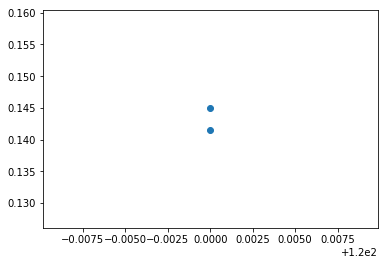

In [66]:
B01fit.append(B01[0])
A1fit.append(A1[0])
gamma1fit.append(gamma1[0])
coffset.append(offset[0])

if number == 2:
    B02fit.append(B02[0])
    A2fit.append(A2[0])
    gamma2fit.append(gamma2[0])
    
if number == 3:
    B02fit.append(B02[0])
    A2fit.append(A2[0])
    gamma2fit.append(gamma2[0])
    
    B03fit.append(B03[0])
    A3fit.append(A3[0])
    gamma3fit.append(gamma3[0])

    
T.append(float(temperature))
if frequency.find('p') == -1:
    f.append(float(frequency))
else:
    i = frequency.find('p')
    freq = frequency[:i] + '.' + frequency[i+1:]
    f.append(float(freq))

plt.scatter(T, gamma1fit)

In [ ]:
B01fit = B01fit[:-1]
A1fit = A1fit[:-1]
gamma1fit = gamma1fit[:-1]
coffset = coffset[:-1]
T = T[:-1]
f = f[:-1]

In [ ]:
Tfinal = np.array(T)[::2]
ffinal = np.array(f)[::2]

B01final = ( np.array(B01fit)[::2] + np.array(B01fit)[1::2] ) / 2
dB01final = abs( np.array(B01fit)[::2] - np.array(B01fit)[1::2] ) / 2

gamma1final = ( np.array(gamma1fit)[::2] + np.array(gamma1fit)[1::2] ) / 2
dgamma1final = abs( np.array(gamma1fit)[::2] - np.array(gamma1fit)[1::2] ) / 2

A1final = ( np.array(A1fit)[::2] + np.array(A1fit)[1::2] ) / 2
dA1final = abs( np.array(A1fit)[::2] - np.array(A1fit)[1::2] ) / 2

B02final = ( np.array(B02fit)[::2] + np.array(B02fit)[1::2] ) / 2
dB02final = abs( np.array(B02fit)[::2] - np.array(B02fit)[1::2] ) / 2

gamma2final = ( np.array(gamma2fit)[::2] + np.array(gamma2fit)[1::2] ) / 2
dgamma2final = abs( np.array(gamma2fit)[::2] - np.array(gamma2fit)[1::2] ) / 2

A2final = ( np.array(A2fit)[::2] + np.array(A2fit)[1::2] ) / 2
dA2final = abs( np.array(A2fit)[::2] - np.array(A2fit)[1::2] ) / 2

#B03final = ( np.array(B03fit)[::2] + np.array(B03fit)[1::2] ) / 2
#dB03final = abs( np.array(B03fit)[::2] - np.array(B03fit)[1::2] ) / 2

#gamma3final = ( np.array(gamma3fit)[::2] + np.array(gamma3fit)[1::2] ) / 2
#dgamma3final = abs( np.array(gamma3fit)[::2] - np.array(gamma3fit)[1::2] ) / 2

#A3final = ( np.array(A3fit)[::2] + np.array(A3fit)[1::2] ) / 2
#dA3final = abs( np.array(A3fit)[::2] - np.array(A3fit)[1::2] ) / 2

offsetfinal = ( np.array(coffset)[::2] + np.array(coffset)[1::2] ) / 2
doffsetfinal = abs( np.array(coffset)[::2] - np.array(coffset)[1::2] ) / 2


Tfinal2 = Tfinal[2:len(B02final)+2]
ffinal2 = ffinal[2:len(B02final)+2]

#Tfinal3 = Tfinal[1:len(B03final)+1]
#ffinal3 = ffinal[1:len(B03final)+1]

In [ ]:
g1 = ffinal/B01final/13.98
dg1 = ffinal/B01final**2/13.98 * dB01final

g2 = ffinal2/B02final/13.98
dg2 = ffinal2/B02final**2/13.98 * dB02final

#g3 = ffinal3/B03final/13.98
#dg3 = ffinal3/B03final**2/13.98 * dB03final

plt.errorbar(Tfinal2, g2, yerr=dg2)

In [ ]:
plt.errorbar(Tfinal2, A2final, yerr=dA2final)

In [ ]:
plt.errorbar(Tfinal2, gamma2final, yerr=dgamma2final)

In [ ]:
plt.errorbar(Tfinal, offsetfinal, yerr=doffsetfinal)

In [ ]:
data = [Tfinal, ffinal, g1, dg1, gamma1final, dgamma1final, A1final, dA1final, B01final, dB01final, offsetfinal, doffsetfinal]
names = ['T', 'f', 'g', 'dg', 'linewidth', 'dlinewidth', 'intensity', 'dintensity', 'B0', 'dB0', 'offset', 'doffset']
units = ['K', 'GHz', '', '', 'T', 'T', 'a.u.', 'a.u.', 'T', 'T', 'a.u.', 'a.u.']

com = frequency + ' GHz'
comments = [com, com, com, com, com, com, com, com, com, com, com, com]

filename = path1+'ESR_fixed_powder\\fits\\TempDep247.6GHz_resonance1.txt'

save (data, names, units, comments, filename)


In [ ]:
data = [Tfinal2, ffinal2, g2, dg2, gamma2final, dgamma2final, A2final, dA2final, B02final, dB02final, offsetfinal, doffsetfinal]
names = ['T', 'f', 'g', 'dg', 'linewidth', 'dlinewidth', 'intensity', 'dintensity', 'B0', 'dB0', 'offset', 'doffset']
units = ['K', 'GHz', '', '', 'T', 'T', 'a.u.', 'a.u.', 'T', 'T', 'a.u.', 'a.u.']

com = frequency + ' GHz'
comments = [com, com, com, com, com, com, com, com, com, com, com, com]

filename = path1+'ESR_fixed_powder\\fits\\TempDep247.6GHz_resonance2.txt'

save (data, names, units, comments, filename)

In [ ]:
data = [Tfinal3, ffinal3, g3, dg3, gamma3final, dgamma3final, A3final, dA3final, B03final, dB03final, offsetfinal, doffsetfinal]
names = ['T', 'f', 'g', 'dg', 'linewidth', 'dlinewidth', 'intensity', 'dintensity', 'B0', 'dB0', 'offset', 'doffset']
units = ['K', 'GHz', '', '', 'T', 'T', 'a.u.', 'a.u.', 'T', 'T', 'a.u.', 'a.u.']

com = frequency + ' GHz'
comments = [com, com, com, com, com, com, com, com, com, com, com, com]

filename = path1+'ESR_fixed_powder\\fits\\TempDep247.6GHz_resonance3.txt'

save (data, names, units, comments, filename)

# Fit all data files in folder

In [ ]:
##############################################################################################################################
##############################################################################################################################

# set once in the beginning
compound = 'Li'
state = 'fixed'
#measurement = '4 K'
measurement = 'TempDep330.5'

##############################################################################################################################
##############################################################################################################################

# create file path of the folder containing all the data files
path1 = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\" + compound + "CuFe2(VO4)3 powder\\"
path2 = "ESR_" + state + "_powder\\processed_data\\"
folder = path1 + path2 + measurement

# gives array of all the filesnames contained in previously created folder
files = os.listdir(folder)

T = []
for i in files:
    filename = folder + '\\' + i
    T.append( float( comment(filename)[:comment(filename).find('K')] ) )

T = np.array(T)
files = np.array(files)[T.argsort()]
    

    
#initial_guess = [ B01[0], A1[0], gamma1[0], angle[0] ]
    
B01 = []
gamma1 = []
A1 = []
B02 = []
gamma2 = []
A2 = []
angle = []
T = []
f = []
offset = []

for i in files: #[::-1]:
    # import data
    filename = folder+'\\'+i
    data = data_import(filename, 3)
    
    # put the important data into arrays
    # check if phase correction has been performed on this data set
    # this is done by simply checking if the imported data has the right amount of columns
    if len(data) == 12:
        field = data[0] # magnetic field
        Amp_pc = data[3] # phase corrected data
        Amp_bg = data[7] # only baseline corrected
    else:
        field = data[0] # magnetic field
        Amp_bg = data[3] # only baseline corrected
        
        
    ##############################################################################################################################
    ##############################################################################################################################
    # do you want to fit the phase corrected or baseline corrected data?
    # Amp_pc or Amp_bg
    if len(data) == 12:
        data = Amp_pc
    else:
        data = Amp_bg
    # how many Lorentzians do you want to fit to the data? - 1 or 2
    number = 1
    ##############################################################################################################################
    ##############################################################################################################################
    
    # get rid of all possible np.nan's in the data arrays
    mask = np.logical_not(np.isnan(data))
    data = data[mask]
    B = field[mask]
    
    # fit one or two Lorentzian absorption curves to the data
    # how many depends on what you entered above
    if number == 1:
        lower_bounds = [0, 0, 0, -np.inf] #, -np.inf, -np.inf]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf] #, np.inf, np.inf]
        
        popt, pcov = curve_fit (one_Lor_w_phase, B, data, initial_guess, bounds = (lower_bounds, upper_bounds), 
                                maxfev=70000, ftol=2.220446049250313e-16 )
        
        #initial_guess = [ popt[0], popt[1], popt[2], popt[3] ]
        
        #if float(comment(filename)[:comment(filename).find('K')]) < 35:
        #    initial_guess = [ popt[0], popt[1]/5, popt[2], popt[3] ]
        
    elif number == 2:
        lower_bounds = [0, 0, 0, 0, 0, 0]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
        
        initial_guess = [B01i[-2], A1i[-2], gamma1i[-2], B02i[-2], A2i[-2], gamma2i[-2]]
        popt, pcov = curve_fit (two_Lorentzians, B, data, initial_guess, bounds = (lower_bounds, upper_bounds), 
                                maxfev=70000, ftol=2.220446049250313e-16 )
        
    
    # put the fit results into variables
    B01.append([popt[0], pcov[0,0]])
    A1.append([popt[1], pcov[1,1]])
    gamma1.append([popt[2], pcov[2,2]])
    
    angle.append([popt[3], pcov[3,3]])
    #offset.append([popt[4], pcov[4,4]])
    T.append(float(comment(filename)[:comment(filename).find('K')]))
    f.append(float(comment(filename)[comment(filename).find('K')+2 : comment(filename).find('G')]))

    
    
    if number == 2:
        B02.append([popt[3], pcov[3,3]])
        A2.append([popt[4], pcov[4,4]])
        gamma2.append([popt[5], pcov[5,5]])
    elif number == 1:
        B02.append([np.nan, np.nan])
        A2.append([np.nan, np.nan])
        gamma2.append([np.nan, np.nan])
    


B01 = np.array(B01)#[::-1]
gamma1 = np.array(gamma1)#[::-1]
A1 = np.array(A1)#[::-1]
B02 = np.array(B02)#[::-1]
gamma2 = np.array(gamma2)#[::-1]
A2 = np.array(A2)#[::-1]
angle = np.array(angle)#[::-1]
offset = np.array(offset)#[::-1]
T = np.array(T)#[::-1]
f = np.array(f)#[::-1]
    
    
B01_ave = (B01[::2] + B01[1::2]) / 2
gamma1_ave = (gamma1[::2] + gamma1[1::2]) / 2
A1_ave = (A1[::2] + A1[1::2]) / 2
B02_ave = (B02[::2] + B02[1::2]) / 2
gamma2_ave = (gamma2[::2] + gamma2[1::2]) / 2
A2_ave = (A2[::2] + A2[1::2]) / 2
angle_ave = (angle[::2] + angle[1::2]) / 2
offset_ave = (offset[::2] + offset[1::2]) / 2
Tave = T[::2]
fave = f[::2]

In [ ]:
plt.scatter(Tave, f[0]/B01_ave[:,0]/13.98)
#plt.ylim([1.5, 5])

In [ ]:
plt.scatter(Tave, A1_ave[:,0])

In [ ]:
plt.scatter(Tave, gamma1_ave[:,0])
#plt.ylim([0,5])

In [ ]:
plt.scatter(Tave, angle_ave[:,0])

# Plot individual fits

In [ ]:
temp = 200
sweep = 'down'


if sweep == 'up':
    sweep = 0
else:
    sweep = 1
    

index = np.arange(len(T))[abs(T-temp)-min(abs(T-temp))<0.1][0] + sweep

# import data
filename = folder+'\\'+files[index]
data = data_import(filename, 3)
    
# put the important data into arrays
# check if phase correction has been performed on this data set
# this is done by simply checking if the imported data has the right amount of columns
if len(data) == 12:
    field = data[0] # magnetic field
    Amp_pc = data[3] # phase corrected data
    Amp_bg = data[7] # only baseline corrected
else:
    field = data[0] # magnetic field
    Amp_bg = data[3] # only baseline corrected
    
if len(data) == 12:
    data = Amp_pc
else:
    data = Amp_bg

plt.title( str(T[index]) + ' K' )
plt.plot(field, data)

#fit = one_Lor_w_phase_and_offset(field, B01[index,0], gamma1[index,0], A1[index,0], angle[index, 0], offset[index,0])
fit = one_Lorentzian(field, B01[index,0], gamma1[index,0], A1[index,0])
plt.plot(field, fit)

# Numerically Integrate All Data Files

<ErrorbarContainer object of 3 artists>

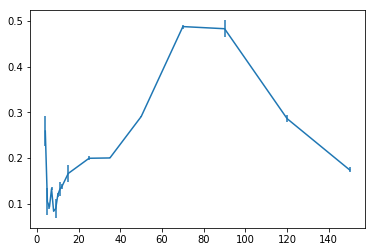

In [137]:
from scipy.integrate import trapz #simps
##############################################################################################################################
##############################################################################################################################

# set once in the beginning
compound = 'Na'
state = 'fixed'
#measurement = '4 K'
measurement = 'TempDep099p6'

##############################################################################################################################
##############################################################################################################################

# create file path of the folder containing all the data files
path1 = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\" + compound + "CuFe2(VO4)3 powder\\"
path2 = "ESR_" + state + "_powder\\"#processed_data\\"
folder = path1 + path2 + measurement + '\\phase corrected'

# gives array of all the filesnames contained in previously created folder
files = [i for i in os.listdir(folder) if i.find('.txt') != -1]
#files = np.array([i for i in files if i.find('200')==-1])

T = []
for i in files:
    filename = folder + '\\' + i
    T.append( float( comment(filename)[:comment(filename).find('K')] ) )

T = np.array(T)
files = np.array(files)[T.argsort()]
T = sorted(T)
    

    
#initial_guess = [ B01[0], A1[0], gamma1[0], angle[0] ]
    
intensity = np.zeros(len(files))

for i in np.arange(len(files)): #[::-1]:
    # import data
    filename = folder+'\\'+files[i]
    data = data_import(filename, 3)
    
    # put the important data into arrays
    # check if phase correction has been performed on this data set
    # this is done by simply checking if the imported data has the right amount of columns
    if len(data) == 12:
        field = data[0] # magnetic field
        Amp_pc = data[3] # phase corrected data
        Amp_bg = data[7] # only baseline corrected
    else:
        field = data[0] # magnetic field
        Amp_bg = data[3] # only baseline corrected
        
        
    ##############################################################################################################################
    ##############################################################################################################################
    # do you want to fit the phase corrected or baseline corrected data?
    # Amp_pc or Amp_bg
    if len(data) == 12:
        data = Amp_pc
    else:
        data = Amp_bg
    # how many Lorentzians do you want to fit to the data? - 1 or 2
    
    ##############################################################################################################################
    ##############################################################################################################################
    
    
    # get rid of all possible np.nan's in the data arrays
    mask = np.logical_not(np.isnan(data))
    data = data[mask]
    B = field[mask]
    
    intensity[i] = abs(trapz(data, B))

intensity_ave = (intensity[::2] + intensity[1::2])/2
intensity_error = abs(intensity[::2] - intensity[1::2])/2
T_ave = T[::2]
plt.errorbar(T_ave, intensity_ave, yerr = intensity_error)

In [131]:
T

4.0

In [ ]:
plt.scatter(T_ave, intensity_ave/max(intensity_ave))
plt.scatter(T127, A127/max(A127))

In [136]:
int263p3 = intensity_ave
dint263p3 = intensity_error
T263p3 = T_ave

In [134]:
int247p6 = intensity_ave
dint247p6 = intensity_error
T247p6 = T_ave

In [139]:
int99p6 = intensity_ave
dint99p6 = intensity_error
T99p6 = T_ave

In [140]:
a = max([len(T263p3), len(T247p6), len(T99p6)])
I26 = np.nan * np.zeros(a)
dI26 = np.nan * np.zeros(a)
T26 = np.nan * np.zeros(a)

I24 = np.nan * np.zeros(a)
dI24 = np.nan * np.zeros(a)
T24 = np.nan * np.zeros(a)

I99 = np.nan * np.zeros(a)
dI99 = np.nan * np.zeros(a)
T99 = np.nan * np.zeros(a)

I26[:len(T263p3)] = int263p3
dI26[:len(T263p3)] = dint263p3
T26[:len(T263p3)] = T263p3

I24[:len(T247p6)] = int247p6
dI24[:len(T247p6)] = dint247p6
T24[:len(T247p6)] = T247p6

I99[:len(T99p6)] = int99p6
dI99[:len(T99p6)] = dint99p6
T99[:len(T99p6)] = T99p6

In [141]:
data = [T26, I26, dI26, T24, I24, dI24, T99, I99, dI99]
names = ['T', 'ESR Transmission', 'error', 'T', 'ESR Transmission', 'error', 'T', 'ESR Transmission', 'error']
comments = ['263.3 GHz', '263.3 GHz', '263.3 GHz', '247.6 GHz', '247.6 GHz', '247.6 GHz', '99.6 GHz', '99.6 GHz','99.6 GHz']
units = ['K', 'a.u.', 'a.u.', 'K', 'a.u.', 'a.u.', 'K', 'a.u.', 'a.u.']

path1 = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\" + compound + "CuFe2(VO4)3 powder\\"
path2 = "ESR_" + state + "_powder\\"#processed_data\\"
filename = path1 + path2 + '\\fits\\inegrated_intensity.txt'

save (data, names, units, comments, filename)